In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler as undersampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, GroupKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shayanfazeli/heartbeat

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
 96% 95.0M/98.8M [00:02<00:00, 42.7MB/s]
100% 98.8M/98.8M [00:03<00:00, 34.1MB/s]


In [3]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [4]:
ds= pd.read_csv("mitbih_train.csv")
ds_2 = ds.copy()
ds_2.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


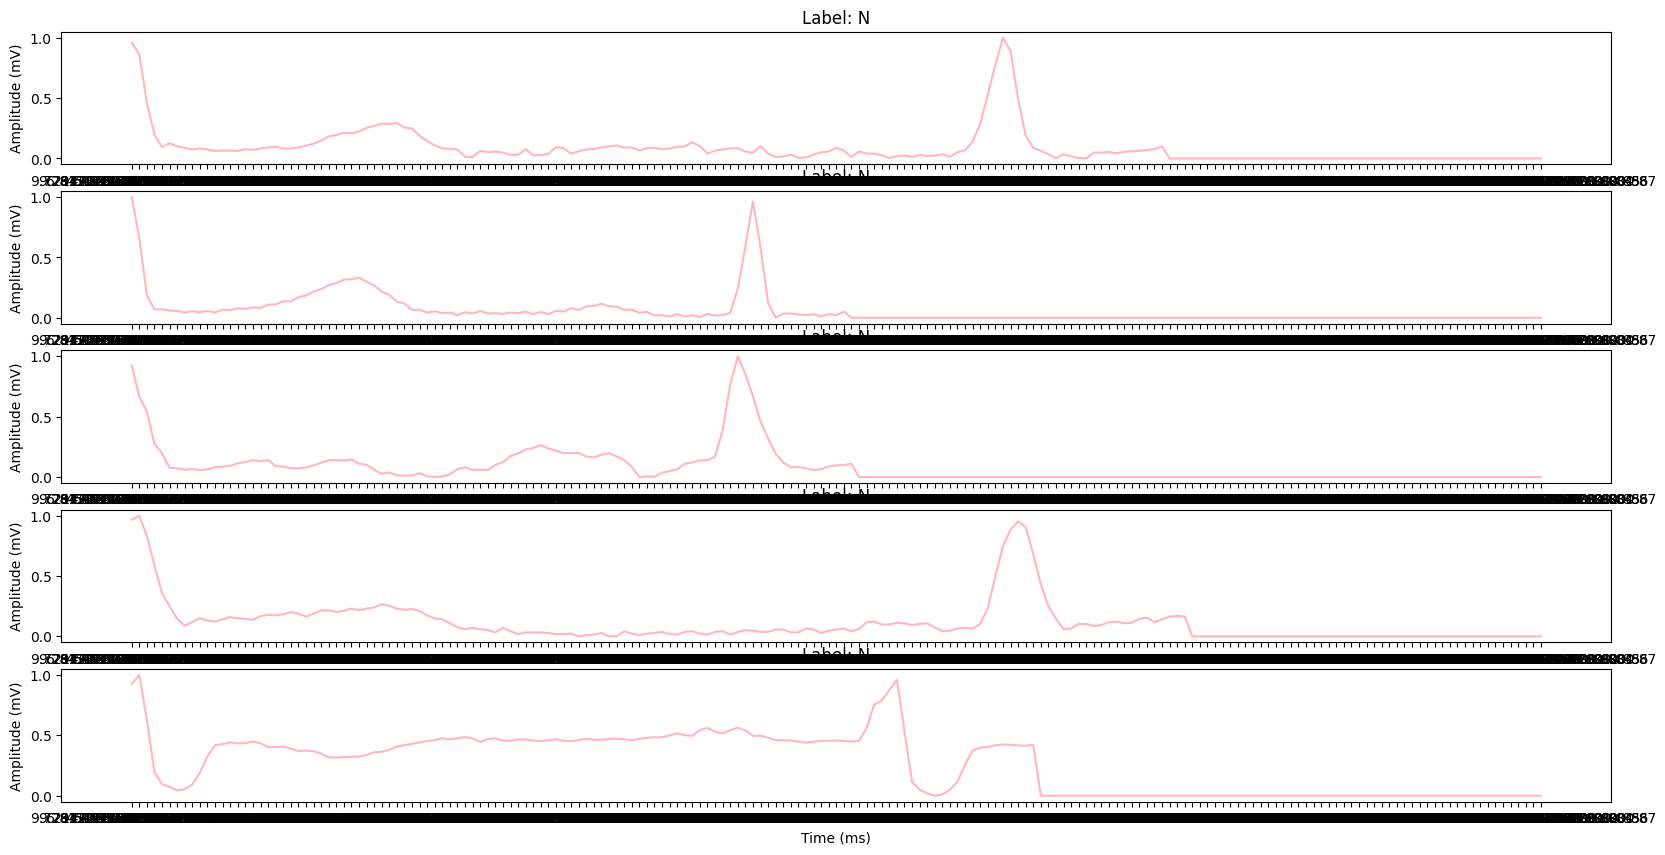

In [7]:
X_df = ds_2.iloc[:, :-1]
X_df = X_df.astype('float')

y_df = ds_2.iloc[:, -1]
y_df = y_df.astype('int')

class_names = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
fig, ax = plt.subplots(5, 1, figsize=(20, 10))
for i in range(5):
    ax[i].plot(X_df.iloc[i, :],color="#FFB6C1")
    ax[i].set_title(f'Label: {class_names[y_df[i]]}')
    ax[i].set_xlabel('Time (ms)')
    ax[i].set_ylabel('Amplitude (mV)')

<Axes: xlabel='0.000000000000000000e+00.88', ylabel='count'>

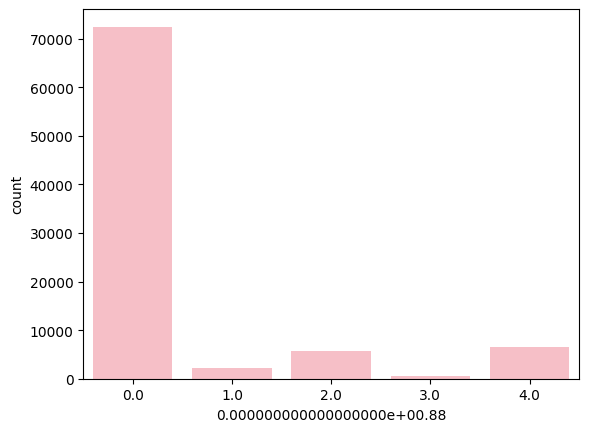

In [8]:
d=ds_2.keys()
sns.countplot(x=ds_2[d[-1]],data=ds_2,color="#FFB6C1")

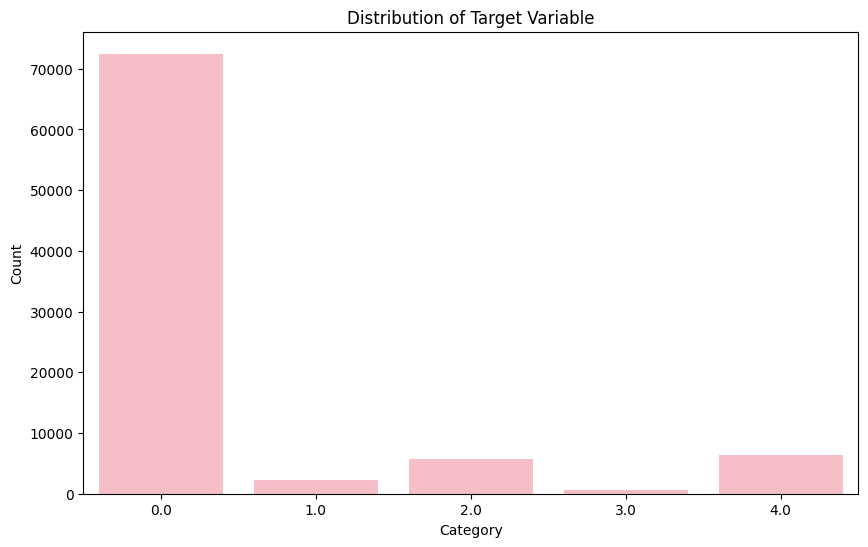

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='0.000000000000000000e+00.88', data=ds_2,color="#FFB6C1")
plt.title('Distribution of Target Variable')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [10]:
ds_2['0.000000000000000000e+00.88'] = ds_2['0.000000000000000000e+00.88'].replace(2,1)
ds_2['0.000000000000000000e+00.88'] = ds_2['0.000000000000000000e+00.88'].replace(3,1)
ds_2['0.000000000000000000e+00.88'] = ds_2['0.000000000000000000e+00.88'].replace(4,1)


In [11]:
x = ds_2.drop('0.000000000000000000e+00.88', axis=1)
Y = ds_2['0.000000000000000000e+00.88']

In [12]:
from imblearn.over_sampling import SMOTE
ratio=.8
oversampler = SMOTE( sampling_strategy=ratio,random_state=42)
x_sampled, y_sampled = oversampler.fit_resample(x,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


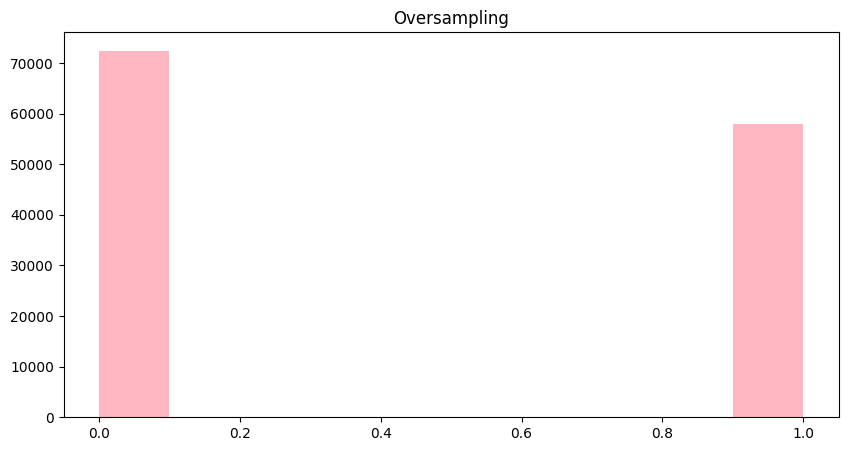

In [13]:
plt.figure(figsize=(10,5))
plt.hist(y_sampled,color="#FFB6C1")
plt.title('Oversampling')
plt.show()

In [14]:
count_0 = 0
count_1 = 0
for row in y_sampled:
  if row == 0.0:
    count_0 +=1
  elif row == 1.0:
    count_1 +=1
print(count_0, count_1)
print(count_1/count_0)

72470 57976
0.8


In [15]:
df_filtered = ds[ds['0.000000000000000000e+00.88'] != 0]
df_filtered['0.000000000000000000e+00.88']

,0.000000000000000000e+00.88
72470,1.0
72471,1.0
72472,1.0
72473,1.0
72474,1.0
...,...
87548,4.0
87549,4.0
87550,4.0
87551,4.0


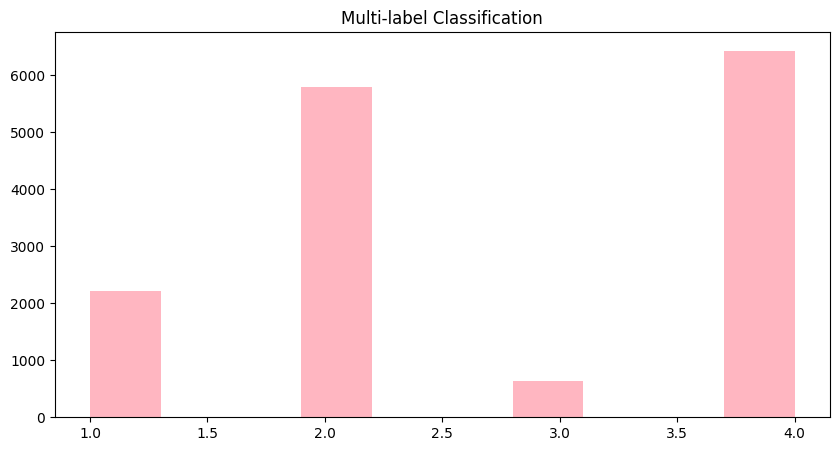

In [16]:
plt.figure(figsize=(10,5))
plt.hist(df_filtered['0.000000000000000000e+00.88'].values,color="#FFB6C1")
plt.title('Multi-label Classification')
plt.show()

In [17]:
x = df_filtered.drop('0.000000000000000000e+00.88', axis=1) #set the new data (filtered data)
Y = df_filtered['0.000000000000000000e+00.88']

In [18]:
oversampler = SMOTE( sampling_strategy= "minority",random_state=42)
xx, yy = oversampler.fit_resample(x,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [19]:
dict={
    1:4200
    ,2:5788
    ,3:4700
    ,4:6431
}
oversampler = SMOTE( sampling_strategy= dict,random_state=42)
xxx, yyy = oversampler.fit_resample(x,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


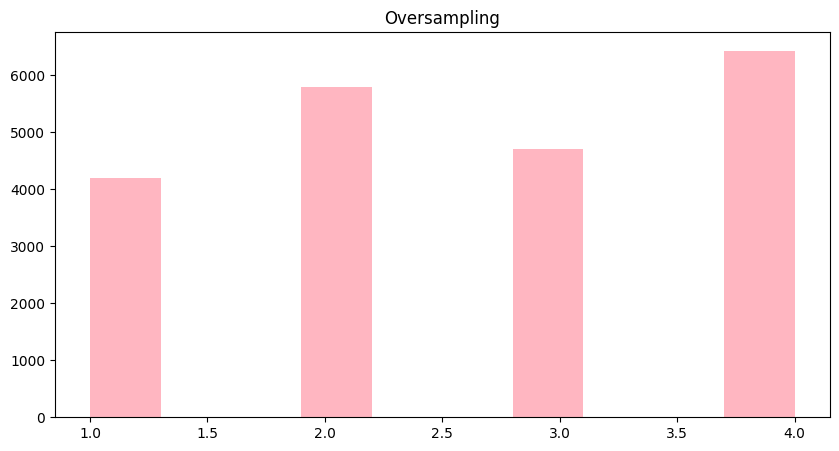

In [20]:
plt.figure(figsize=(10,5))
plt.hist(yyy,color="#FFB6C1")
plt.title('Oversampling')
plt.show()

In [21]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

In [22]:

X_train, X_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size=0.2, random_state=42)
knn_binary = KNeighborsClassifier(n_neighbors=3)
knn_binary.fit(X_train, y_train)
y_pred = knn_binary.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cmm = confusion_matrix(y_test, y_pred)

Accuracy: 0.9836719049444231


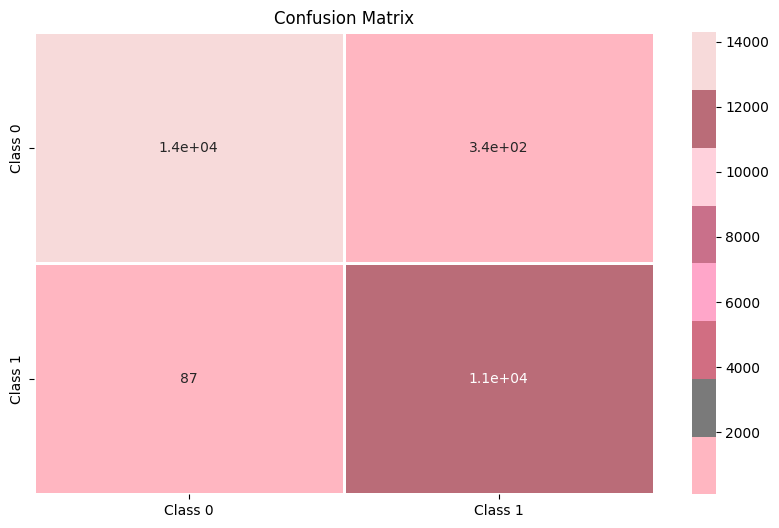

In [45]:
plt.figure(figsize=(10,6))
pink_palette= ["#D95A85","#4A4A4A", "#50778A","#FFB6C1", "#7A7A7A", "#D16E82","#FFA6C9", "#C9708A","#FFD1DC", "#BA6C78","#F7DADA"]
sns.heatmap(cmm, annot = True ,xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], cmap=pink_palette[3:], linewidths=0.9)
plt.title("Confusion Matrix")
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9726946107784431


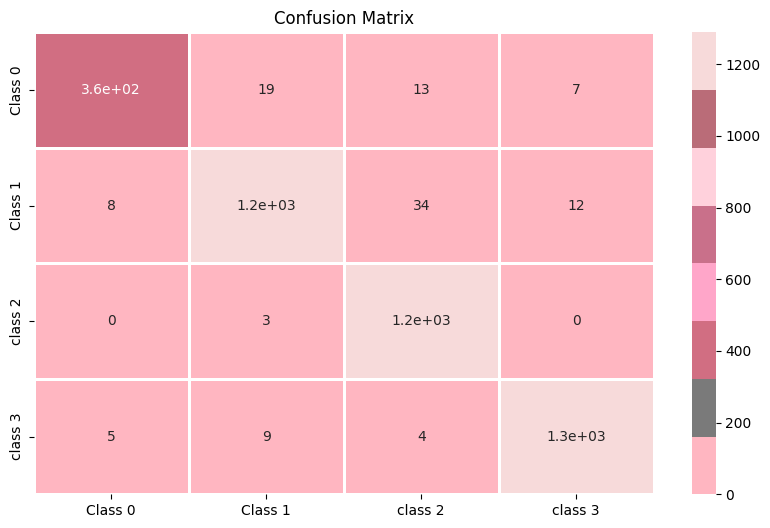

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot = True ,xticklabels=['Class 0', 'Class 1','class 2','class 3'], yticklabels=['Class 0', 'Class 1','class 2','class 3'],cmap=pink_palette[3:], linewidths=0.9)
plt.title("Confusion Matrix")
plt.show()